<br />
<center><font size='6px' color='#mmvvbb'><b>TP n°2 : Segmentation d'une image</b></font>
<br />
<br />
<br />
<font size='5px' color='#ccddvv'><b>Hadhémi Gharbi</b></font>
<br />
<br />
<font size='3px' color='#ccddvv'><b>Groupe 1</b></font>
<br />
<br />
</center>

<hr color="black" />

<h2><font color='#d70e76'>I - Les bibliothèques utilisées: </font></h2>

In [118]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButton
import ipywidgets as widgets

In [122]:
file = open("le_lapin.jpg", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='jpg',
    width=350,
    height=450,
)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x1a.Exif\x00\x00II*\x00\x…

<h2><font color='#d70e76'>II - L'algorithme de K-means : Clustering</font></h2>

In [123]:
def segmentation(k):
    image = cv2.imread('le_lapin.jpg')
    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = k) 

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    plt.figure(figsize=(5,6))
    cv2.imwrite('le_lapin1.jpg', quant)
    return plt.imshow(image)
    plt.show()
    cv2.imread('le_lapin.jpg')
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [124]:
interact(segmentation,k=widgets.IntSlider(min=2, max=20, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=20, min=2), Output()), _dom_classes=('widget-int…

In [130]:
file = open("le_lapin1.jpg", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='jpg',
    width=350,
    height=450,
)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

<h2><font color='#d70e76'>II - Le bruit sur l'image</font></h2>

In [131]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

img_path="le_lapin.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(mode):
    img_path="le_lapin.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

interact(plotnoise,
    mode=widgets.ToggleButtons(    
    options=['Gaussian', 'Localvar', 'Poisson', 'Salt', 'Pepper', 'S&P', 'Speckle'],
    description='Bruits :',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Bruit de Gaussain', 'Bruit de Localvar', 'Bruit de Poisson', 'Bruit de salt', 'Bruit de Pepper', 'Bruit de S&P','Bruit de specle'],
#     icons=['check'] * 3
));
plt.figure(figsize=(18,24))
plt.show()

interactive(children=(ToggleButtons(button_style='success', description='Bruits :', options=('Gaussian', 'Loca…

<Figure size 1296x1728 with 0 Axes>

<h2><font color='#d70e76'>III - Débruitage</font></h2> 

<I><b> NL-Means : Le but est donc de faire la moyenne de tous les pixels dont le même contenu
       est très similaire plus ou moins du bruit.</b></I>

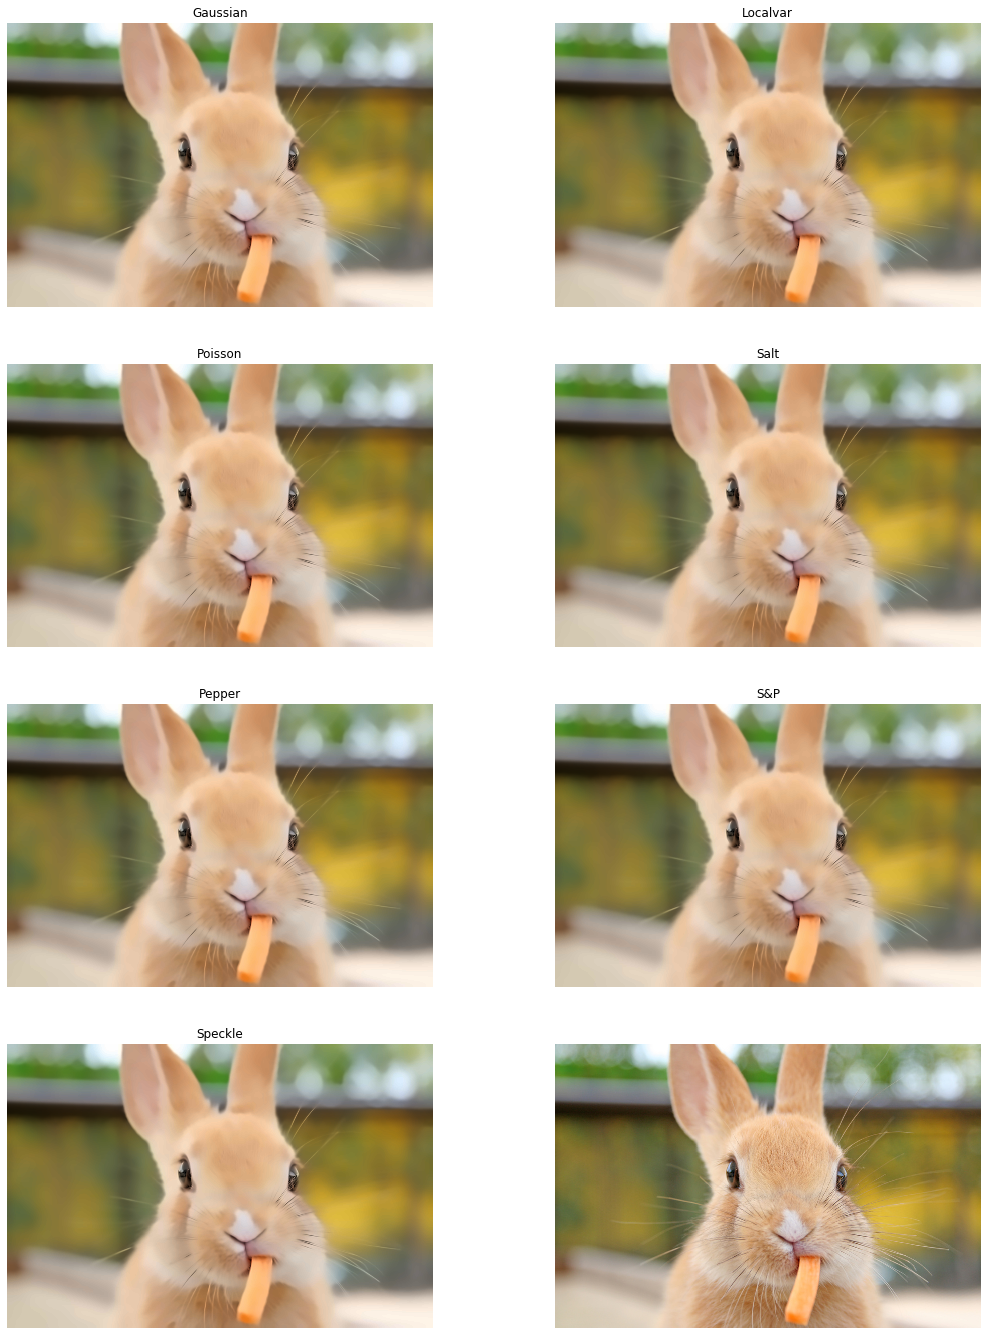

In [132]:
images = cv2.imread('le_lapin.jpg')
b,g,r = cv2.split(images)          
rgb_img = cv2.merge([r,g,b])

def plotdenoising(rgb_img, mode, b, g, r):
    plt.subplot(b,g,r)
    if mode is not None:
        dst = cv2.fastNlMeansDenoisingColored(rgb_img,None,10,10,7,21)        
        plt.imshow(dst)
        b,g,r = cv2.split(dst)      
        rgb_dst = cv2.merge([r,g,b])
        
    if mode is None:
        plt.imshow(rgb_img)
    plt.title(mode)
    plt.axis("off")     

rgb_dst = cv2.merge([r,g,b])
plt.figure(figsize=(18,24))
b=4
g=2
plotdenoising(rgb_dst, "Gaussian", b,g,1)
plotdenoising(rgb_dst, "Localvar", b,g,2)
plotdenoising(rgb_dst, "Poisson", b,g,3)
plotdenoising(rgb_dst, "Salt", b,g,4)
plotdenoising(rgb_dst, "Pepper", b,g,5)
plotdenoising(rgb_dst, "S&P", b,g,6)
plotdenoising(rgb_dst, "Speckle", b,g,7)
plotdenoising(rgb_dst, None, b,g,8)
plt.show()

<h2><font color='#d70e76'> IV - La comparaison entre l'image originale et l'image aprés le débruitage</font></h2>

<font size="4px">
    Aprés le débruitage les images sont constantes par morceaux, les voisinages de pixels/voxels sont largement corrélés.<br />
    On peut conclure donc que le débruitage moyennage local de voxels (la réduction du bruit signifie des pixels locaux).
</font>

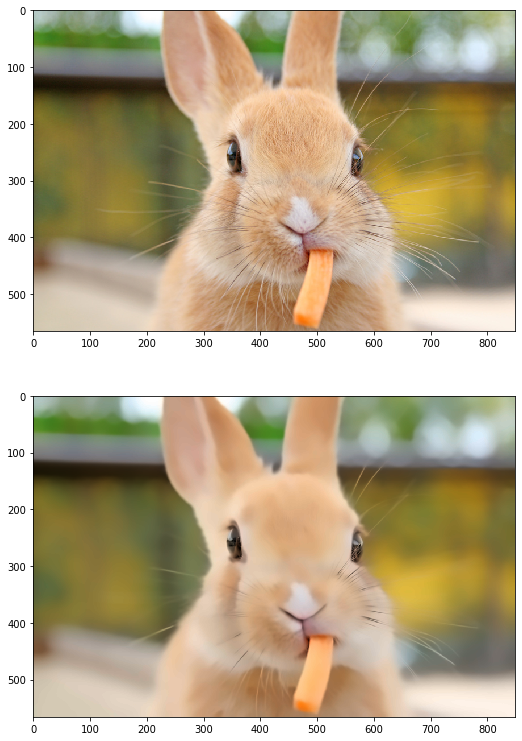

In [133]:
images = cv2.imread('le_lapin.jpg')
b,g,r = cv2.split(images)  
rgb_img = cv2.merge([r,g,b])

#Denoising
dst = cv2.fastNlMeansDenoisingColored(images,None,10,10,7,21)

b,g,r = cv2.split(dst)        
rgb_dst = cv2.merge([r,g,b])     

plt.figure(figsize=(9,13))
plt.subplot(211),plt.imshow(rgb_img)
plt.subplot(212),plt.imshow(rgb_dst)
plt.show()

<h2><font color='#d70e76'>V - Les filters sur l'image</font></h2>

In [ ]:
img = cv2.imread("place.jpg")

averaging = cv2.blur(img, (21, 21))
gaussian = cv2.GaussianBlur(img, (21, 21), 0)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 350, 350)

cv2.imshow("Original image", img)
cv2.imshow("Averaging", averaging)
cv2.imshow("Gaussian", gaussian)
cv2.imshow("Median", median)
cv2.imshow("Bilateral", bilateral)

cv2.imread('place.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

<h2><font color='#d70e76'>VI - Le fichier requirements.txt</font></h2>

In [29]:
%load_ext watermark
%watermark -v -m -p numpy,matplotlib,cv2,cluster,imageio,scikit-image,watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.3
IPython 7.6.1

numpy 1.16.4
matplotlib 3.1.0
cv2 4.4.0
cluster 1.4.1.post2
imageio 2.5.0
scikit-image not installed
watermark 2.0.2

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores  : 8
interpreter: 64bit
 
last updated: Tue Oct 27 2020 13:48:02 Europe de l?Ouest


In [30]:
pip list

Package                            Version    
---------------------------------- -----------
alabaster                          0.7.12     
altair                             4.1.0      
anaconda-client                    1.7.2      
anaconda-navigator                 1.9.7      
anaconda-project                   0.8.3      
asn1crypto                         0.24.0     
astroid                            2.2.5      
astropy                            3.2.1      
atomicwrites                       1.3.0      
attrs                              19.1.0     
Babel                              2.7.0      
backcall                           0.1.0      
backports.functools-lru-cache      1.5        
backports.os                       0.1.1      
backports.shutil-get-terminal-size 1.0.0      
backports.tempfile                 1.0        
backports.weakref                  1.0.post1  
beautifulsoup4                     4.7.1      
bitarray                           0.9.3      
bkcharts     

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda env export > environment.yaml